# PCML Project-1 ~ Team #60

## Initial Python Imports

In [1]:
# Useful starting lines
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import datetime

from costs import compute_loss

%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
from helpers import *

DATA_TRAIN_PATH = "../Data/train.csv" # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

#print the shape of the offset x matrix.
print('y shape: ',y.shape)
print('original tX shape: ',tX.shape)
print('ids shape: ',ids.shape)

y shape:  (200,)
original tX shape:  (200, 30)
ids shape:  (200,)


## Data preprocessing

### Count Outliers - Extreme values

In [3]:
outliers = count_outliers(tX,-999)
for feature in range(tX.shape[1]):
    print('feature: ',feature,' -> ',outliers[feature])

feature:  0  ->  35.0
feature:  1  ->  0.0
feature:  2  ->  0.0
feature:  3  ->  0.0
feature:  4  ->  144.0
feature:  5  ->  144.0
feature:  6  ->  144.0
feature:  7  ->  0.0
feature:  8  ->  0.0
feature:  9  ->  0.0
feature:  10  ->  0.0
feature:  11  ->  0.0
feature:  12  ->  144.0
feature:  13  ->  0.0
feature:  14  ->  0.0
feature:  15  ->  0.0
feature:  16  ->  0.0
feature:  17  ->  0.0
feature:  18  ->  0.0
feature:  19  ->  0.0
feature:  20  ->  0.0
feature:  21  ->  0.0
feature:  22  ->  0.0
feature:  23  ->  87.0
feature:  24  ->  87.0
feature:  25  ->  87.0
feature:  26  ->  144.0
feature:  27  ->  144.0
feature:  28  ->  144.0
feature:  29  ->  0.0


### Standardization

In [4]:
#standardization
# tX, mean_x, std_x = standardize(tX, mean_x=None, std_x=None)
tX, mean_x, std_x = standardize_outliers(tX)
print('standardized tX shape: ',tX.shape)
print('tX mean shape: ',mean_x.shape)
print('tX std shape: ',std_x.shape)

200 30
(200, 31)
standardized tX shape:  (200, 31)
tX mean shape:  (30,)
tX std shape:  (30,)


### Analysis of output y

In [ ]:
# Histogram of output y
plt.hist(y, bins=10, align='mid')
plt.title("Histogram of output y")
plt.show()

### Analysis of y as a function of all its features (one by one)

In [ ]:
# Analyse y as a function of all the other features (one by one)
plot_features_by_y(y,tX)

## Linear regression using gradient descent

In [ ]:
from gradient_descent import least_squares_GD

# Define the parameters of the algorithm.
max_iters = 1000
gamma = 0.01

# Initialization
w_initial = np.zeros(tX.shape[1])

# Start gradient descent.
# start_time = datetime.datetime.now()
gradient_losses, gradient_ws = least_squares_GD(y, tX, w_initial, gamma, max_iters)
# end_time = datetime.datetime.now()


## Linear regression using stochastic gradient descent

In [ ]:
from stochastic_gradient_descent import least_squares_SGD

# Define the parameters of the algorithm.
max_iters = 1000
gamma = 0.01
batch_size = 1

# Initialization
w_initial = np.zeros(tX.shape[1])

# Start SGD.
stoch_gradient_losses, stoch_gradient_ws = least_squares_SGD(y, tX, w_initial, batch_size, gamma, max_iters)

min_stoch_i, min_stoch_loss = get_min_param_index(stoch_gradient_losses)
print('min index: ',min_stoch_i)
print('min loss: ',min_stoch_loss)

## Least squares regression using normal equations

In [ ]:
from least_squares import least_squares

# start_ls_time = datetime.datetime.now()
ls_wopt, ls_loss = least_squares(y,tX)
# end_ls_time = datetime.datetime.now()
print('loss=',ls_loss)
print('parameters w: ',ls_wopt)

## Ridge regression using normal equations

0.776337276905
degree:  1 	min_rmse:  0.7763372769049375 	lambda:  0.0754312006335
0.782416484896
degree:  2 	min_rmse:  0.782416484895772 	lambda:  0.193069772888
0.909009813081
degree:  3 	min_rmse:  0.9090098130811175 	lambda:  8.28642772855
best degree:  1
best lambda:  0.0754312006335


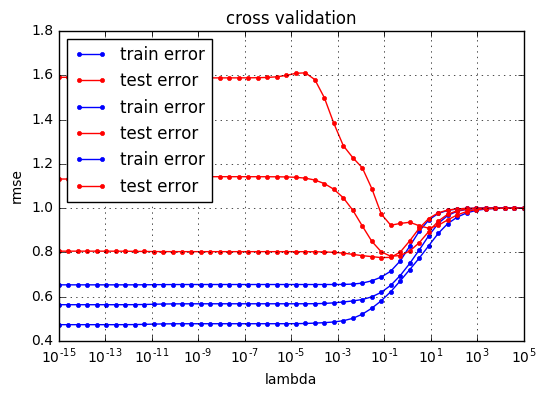

In [7]:
from ridge_regression import cross_validation_ridge_regression
from build_polynomial import build_poly

degrees = range(1,4)
degree_lambdas = []
degree_min_rmse = []
for d in degrees:
    m,l = (cross_validation_ridge_regression(y,tX,degree=d,k_fold=10))
    print('degree: ',d,'\tmin_rmse: ',m,'\tlambda: ',l)
    degree_lambdas.append(l)
    degree_min_rmse.append(m)

degree_minmin_rmse = min(degree_min_rmse)
best_rr_degree = degrees[degree_min_rmse.index(degree_minmin_rmse)]
print('best degree: ',best_rr_degree)
best_rr_lambda = degree_lambdas[best_rr_degree-1]
print('best lambda: ',best_rr_lambda)

In [8]:
from ridge_regression import ridge_regression

best_poly = build_poly(tX,best_rr_degree)
w_ridge, ridge_loss = ridge_regression(y, best_poly,best_rr_lambda)

print('loss: ',ridge_loss)
print('parameters w: ',w_ridge)

NameError: name 'build_poly' is not defined

## Logistic regression using gradient descent or SGD

In [ ]:
from logistic_regression import logistic_regression_gradient_descent
from plots import visualization

lr_loss, lr_w = logistic_regression_gradient_descent(y, tX)

## Regularized logistic regression using gradient descent or SGD

## Kaggle score Aproximation

In [ ]:
from test import *

In [ ]:
test_GD(y, tX, ratio=0.2)

In [ ]:
test_SGD(y, tX, ratio=0.2,max_iters=10000)

In [ ]:
test_LS(y, tX, ratio=0.2)

In [ ]:
best_poly = build_poly(tX,best_rr_degree)
test_RR(y, best_poly, ratio=0.2,lambda_=best_rr_lambda)

In [ ]:
test_LR(y, tX, ratio=0.2,threshold=0.5)

In [ ]:
# test_RLR(y, tX, ratio=0.2)

## Generate predictions and save ouput in csv format for submission:

In [ ]:
# Gradient Descent
weights = gradient_ws[-1]

In [ ]:
# Stochastic Gradient Descent
weights = stoch_gradient_ws[min_stoch_i]

In [ ]:
# Least Squares
weights = ls_wopt

In [ ]:
# Ridge Regression
weights = w_ridge

In [ ]:
# Logistic Regression
weights = lr_w

In [ ]:
# weights =

In [ ]:
DATA_TEST_PATH = "../Data/test.csv" # TODO: download test data and supply path here 
y_test, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
tX_test, _, _ = standardize_outliers(tX_test)

In [ ]:
OUTPUT_PATH = '../Data/results.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_logistic_labels(weights, tX_test,threshold=0.5)
# y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)